In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset (example: Kaggle Energy Consumption dataset)
df = pd.read_csv('/content/Energy_consumption.csv')


In [ ]:
# Simulate IoT sensor data
def simulate_iot_data(size=1000):
    np.random.seed(42)
    timestamps = pd.date_range(start='2024-01-01', periods=size, freq='H')
    temperature = np.random.normal(loc=22, scale=2, size=size)
    humidity = np.random.normal(loc=45, scale=10, size=size)
    occupancy = np.random.randint(0, 2, size=size)
    energy_consumption = 50 + (temperature - 20) * 2 + (humidity - 40) * 0.5 + occupancy * 10 + np.random.normal(0, 5, size=size)

    return pd.DataFrame({
        'timestamp': timestamps,
        'temperature': temperature,
        'humidity': humidity,
        'occupancy': occupancy,
        'energy_consumption': energy_consumption
    })

In [ ]:
# Load or simulate dataset
df = simulate_iot_data()

<ipython-input-77-1e92c83cb045>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=size, freq='H')


In [ ]:
# Preview data
df.head()

,timestamp,temperature,humidity,occupancy,energy_consumption
0,2024-01-01 00:00:00,22.993428,58.993554,1,68.000988
1,2024-01-01 01:00:00,21.723471,54.246337,0,57.319992
2,2024-01-01 02:00:00,23.295377,45.596304,1,68.971716
3,2024-01-01 03:00:00,25.046060,38.530632,0,52.109209
4,2024-01-01 04:00:00,21.531693,51.982233,0,54.445204


In [ ]:
df.tail()

,timestamp,temperature,humidity,occupancy,energy_consumption
995,2024-02-11 11:00:00,21.437799,55.701502,1,71.117065
996,2024-02-11 12:00:00,25.595373,44.734787,0,67.866320
997,2024-02-11 13:00:00,23.281686,36.181253,0,55.349300
998,2024-02-11 14:00:00,20.857642,43.369330,0,45.514967
999,2024-02-11 15:00:00,23.145166,37.550974,0,51.051696


In [ ]:
df.describe()

,timestamp,temperature,humidity,occupancy,energy_consumption
count,1000,1000.000000,1000.000000,1000.00000,1000.000000
mean,2024-01-21 19:29:59.999999744,22.038664,45.708362,0.49000,61.839905
min,2024-01-01 00:00:00,15.517465,15.596114,0.00000,37.439442
25%,2024-01-11 09:45:00,20.704819,38.937583,0.00000,55.557482
50%,2024-01-21 19:30:00,22.050601,45.630771,0.00000,61.976844
75%,2024-02-01 05:15:00,23.295888,52.288822,1.00000,68.810968
max,2024-02-11 15:00:00,29.705463,76.931076,1.00000,91.167348
std,NaN,1.958432,9.974544,0.50015,9.353737


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           1000 non-null   datetime64[ns]
 1   temperature         1000 non-null   float64       
 2   humidity            1000 non-null   float64       
 3   occupancy           1000 non-null   int64         
 4   energy_consumption  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 39.2 KB


In [ ]:
df.isnull().sum()

,0
timestamp,0
temperature,0
humidity,0
occupancy,0
energy_consumption,0


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [ ]:
# Feature Selection
X = df[['temperature', 'humidity', 'occupancy']]
y = df['energy_consumption']

In [ ]:
# Fill missing values
df.fillna(method='ffill', inplace=True)


<ipython-input-86-a78b5bf7d84d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Feature Selection (select numeric columns for simplicity)
features = df.select_dtypes(include=[np.number]).columns.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Define target and features
X = df[features].drop('energy_consumption', axis=1)
y = df['energy_consumption']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 33.52
R^2 Score: 0.65


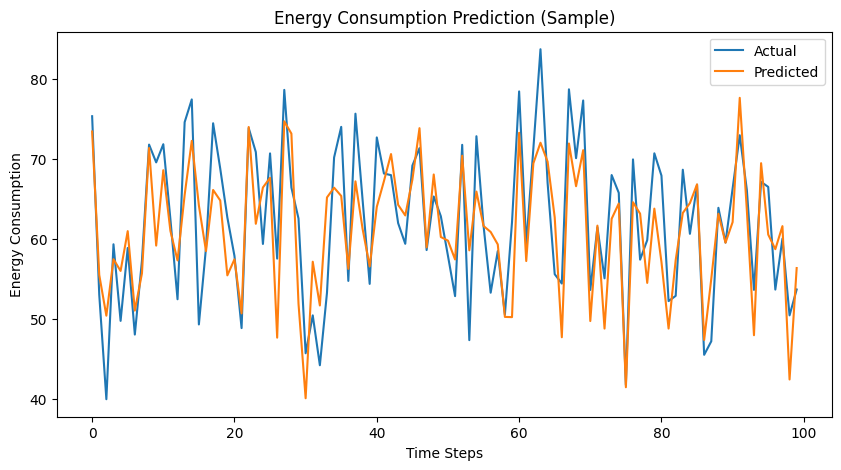

In [ ]:
# Plotting predictions vs actual
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title('Energy Consumption Prediction (Sample)')
plt.xlabel('Time Steps')
plt.ylabel('Energy Consumption')
plt.show()
